1. Problem Definition

a. Influential Factors on Stock Market Trends

1.	Economic Indicators: Metrics such as GDP growth, unemployment, inflation, and interest rates are crucial as they reflect the economy's overall health.

2.	Company Performance: Financial metrics including earnings reports, revenue growth, and profit margins of publicly traded companies.

3.	Political Developments: Elections, policy changes, and geopolitical events can lead to market fluctuations.

4.	Market Sentiment: Investor sentiment influenced by news, social media trends, and market rumours.

5.	Global Events: Natural disasters, pandemics, and global financial crises.

6.	Technological Advances: Innovations or disruptions in technology sectors that affect market trends.

7.	Market Liquidity: The ease with which assets can be traded without affecting their price.

b. Financial News Impact on Market Trends

Financial news can significantly impact market trends by influencing investor sentiment and actions. For example:

•	Positive Earnings Announcements: Reports of higher-than-expected earnings can lead to a rise in stock prices.

•	Mergers and Acquisitions: News of significant mergers or acquisitions can boost the stock prices of the involved companies.

•	Regulatory Changes: Announcements of new regulations can prompt market adjustments as investors evaluate potential impacts on businesses.

2. Data Requirements

a. Necessary Data Types

1.	Historical Stock Prices: Open, high, low, close prices, and trading volumes.

2.	Economic Indicators: GDP, CPI, unemployment rates, etc.

3.	Financial News Articles: News headlines, articles, and summaries related to financial markets.

4.	Corporate Financial Data: Earnings reports, balance sheets, and income statements.

5.	Sentiment Data: Sentiment scores derived from financial news and social media.

b. Data Sources and Collection Methods

1.	Stock Market Data: Yahoo Finance, Google Finance, Bloomberg.

2.	Economic Data: Government databases, World Bank, IMF.

3.	Financial News: News APIs, financial news websites (e.g., Reuters, Bloomberg).

4.	Corporate Data: SEC filings, company websites.

5.	Sentiment Data: Social media platforms and sentiment analysis tools.

To ensure reliability and accuracy, use verified sources, cross-reference data, and perform data cleaning and pre-processing for consistency.

3. Exploratory Data Analysis (EDA) Approach

a. Data Analysis Steps

1.	Data Cleaning: Address missing values, outliers, and inconsistencies.

2.	Descriptive Statistics: Calculate mean, median, variance, etc.

3.	Correlation Analysis: Assess relationships between stock prices, economic indicators, and sentiment scores.

4.	Time Series Analysis: Decompose stock prices into trend, seasonality, and residual components.

b. Visualization Techniques

1.	Line Charts: Visualize stock price trends over time.

2.	Heatmaps: Show correlations between different variables.

3.	Box Plots: Display the distribution of stock prices and economic indicators.

4.	Word Clouds: Visualize the most frequent words in financial news.

5.	Sentiment Trend Graphs: Plot sentiment scores over time.
Visualizations help in identifying patterns, trends, and outliers, thus aiding in understanding the key factors influencing market trends.

4. Model Development Strategy

a. Time Series Forecasting Model

1.	Framework: ARIMA, SARIMA, LSTM (Long Short-Term Memory).

2.	Data and Features: Historical stock prices, economic indicators, lagged variables, moving averages.

b. Sentiment Analysis Model

1.	Framework: Text classification using NLP techniques.

c. Challenges and Solutions

1.	Data Quality: Ensure clean, consistent data through pre-processing
.
2.	Model Overfitting: Use regularization techniques and cross-validation.

3.	Sentiment Analysis Accuracy: Use advanced NLP models and domain-specific lexicons.

5. Investment Insights

a. Integration of Predictions

Combine time series predictions with sentiment scores to create a comprehensive view of market trends. For instance, a bullish sentiment combined with positive price forecasts could indicate a buy opportunity.

b. Dashboard Design

1.	Features:

o	Real-time stock price charts

o	Trends in economic indicators

o	Sentiment score trends

o	Combined market trend predictions

o	News highlights and sentiment analysis

2.	Effective Elements:

o	Interactive visualizations

o	Clear, concise summaries

o	Customizable views for different asset classes

o	Alerts for significant changes in market trends or sentiment

This conceptual framework and strategy can help the investment firm enhance its strategies through informed decision-making based on market trend predictions and sentiment analysis.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
#The 'Open' indicates the price at which the first transaction was completed when the market opened.
#The 'High' and 'Low' reflect the highest and lowest transaction prices during the period, respectively.
#The 'Close' represents the final transaction price before the market closed for the given period.

In [ ]:
data = pd.read_csv(r'C:\Users\user\Desktop\Data Science\Repository\Maxis Stock & Share\Maxis_Stock_Price (19.7.24).csv')

In [ ]:
# Display basic information and first few rows of the dataset
data_info = data.info()
data_head = data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           31 non-null     int64  
 1   Open           31 non-null     float64
 2   High           31 non-null     float64
 3   Low            31 non-null     float64
 4   Close          31 non-null     float64
 5   Volume         31 non-null     int64  
 6   AdjustedClose  31 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.8 KB


In [ ]:
# Step 1: Convert `Date` column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')




In [ ]:
# Step 2: Check for missing values
data.isnull().sum()



Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
AdjustedClose    0
dtype: int64

In [ ]:
# Step 3: Check for duplicates
data.duplicated().sum()



0

In [ ]:
# Step 4: Generate summary statistics

data.describe()



,Open,High,Low,Close,Volume,AdjustedClose
count,31.000000,31.000000,31.000000,31.000000,3.100000e+01,31.000000
mean,3.562258,3.596129,3.530968,3.559677,2.167881e+06,3.559677
std,0.079821,0.076580,0.078416,0.079141,1.126538e+06,0.079141
min,3.440000,3.470000,3.430000,3.430000,5.930000e+05,3.430000
25%,3.495000,3.535000,3.470000,3.510000,1.487250e+06,3.510000
50%,3.550000,3.580000,3.500000,3.530000,1.794900e+06,3.530000
75%,3.635000,3.675000,3.615000,3.640000,2.823200e+06,3.640000
max,3.690000,3.710000,3.660000,3.680000,4.576100e+06,3.680000


In [ ]:
data

,Date,Open,High,Low,Close,Volume,AdjustedClose
0,2024-06-04,3.60,3.70,3.55,3.68,3954700,3.68
1,2024-06-05,3.69,3.71,3.65,3.65,1674700,3.65
2,2024-06-06,3.63,3.66,3.62,3.65,1679500,3.65
3,2024-06-07,3.65,3.68,3.64,3.66,1667800,3.66
4,2024-06-10,3.68,3.68,3.63,3.64,910100,3.64
5,2024-06-11,3.65,3.69,3.65,3.67,1864800,3.67
6,2024-06-12,3.69,3.70,3.65,3.66,1030400,3.66
7,2024-06-13,3.68,3.71,3.66,3.67,1580200,3.67
8,2024-06-14,3.67,3.68,3.62,3.63,2831200,3.63
9,2024-06-18,3.64,3.67,3.60,3.64,1474900,3.64


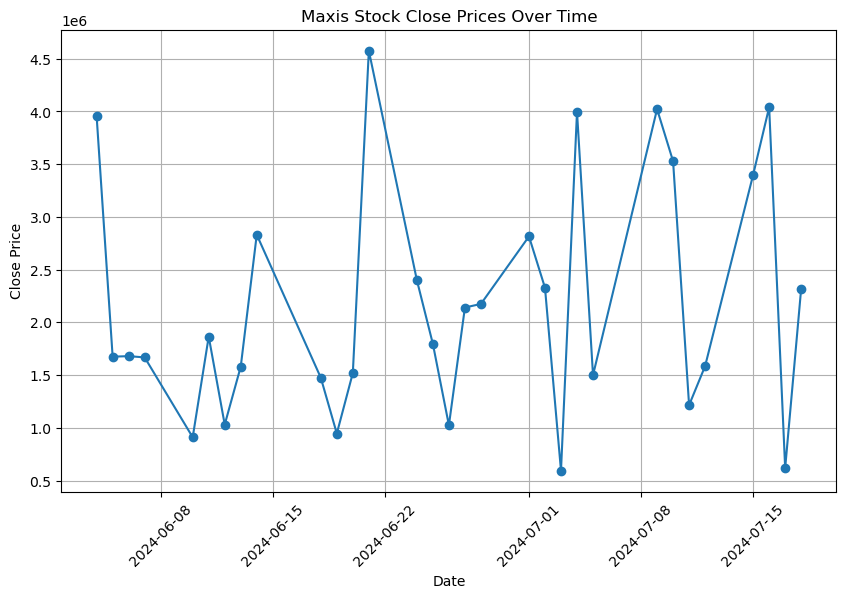

In [ ]:

# Time Series Plot for Close Prices
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Volume'], marker='o')
plt.title('Maxis Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()




The graph shows the closing prices of Maxis stock over a period from early June to mid-July 2024. Here are some observations:

Volatility: The stock prices exhibit significant volatility over the time period, with frequent sharp rises and drops.

Peaks and Troughs: There are noticeable peaks around June 22 and July 1, where the prices reached their highest points (above 4 million). Conversely, there are several low points where the prices dropped to around 1 million or below, notably around June 8, June 15, and July 12.

Trend: There isn't a clear upward or downward trend over the entire period. Instead, the prices oscillate significantly, suggesting that the stock was subject to rapid changes during this time.

Stability: The prices seem to stabilize somewhat around mid-June and early July, although there are still noticeable fluctuations.

To gain more insights, one could look into the factors that influenced these price changes, such as company news, market conditions, or broader economic indicators during this period. Additionally, it would be beneficial to apply statistical analysis or predictive modeling to understand the potential future movements of the stock.

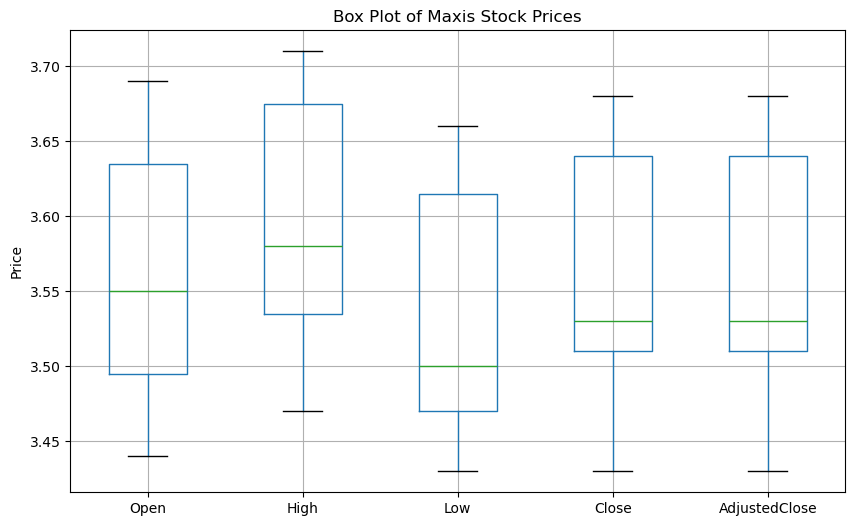

In [ ]:
# Box Plot for Stock Prices
plt.figure(figsize=(10, 6))
data[['Open', 'High', 'Low', 'Close', 'AdjustedClose']].boxplot()
plt.title('Box Plot of Maxis Stock Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The box plot provides a summary of the distribution of Maxis stock prices across different categories (Open, High, Low, Close, Adjusted Close). Here are some observations:

Range and Distribution:

Open: The prices range from approximately 3.45 to 3.70, with a median around 3.55. There are some outliers below 3.45.
High: The prices range from approximately 3.50 to 3.70, with a median slightly above 3.60.
Low: The prices range from approximately 3.40 to 3.65, with a median slightly above 3.50.
Close: The prices range from approximately 3.45 to 3.70, with a median around 3.55.
Adjusted Close: The distribution is similar to the Close prices, which is expected as Adjusted Close typically adjusts for dividends and stock splits.
Medians:

The median prices (represented by the green lines) for all categories are close to each other, generally around the 3.55 to 3.60 range.
Interquartile Range (IQR):

The IQR (the box) for each category shows the range between the first quartile (Q1) and the third quartile (Q3). The IQR for all categories is relatively similar, indicating consistent volatility across the different price types.
Whiskers and Outliers:

The whiskers (lines extending from the boxes) show the range within 1.5 times the IQR from Q1 and Q3. Any data points outside this range are considered outliers.
There are some outliers in the Open and Low categories, indicating occasional extreme price movements.
Symmetry:

The distributions for High and Adjusted Close prices appear more symmetric compared to the others, suggesting more balanced price movements within those categories.
This box plot helps visualize the central tendency and spread of the stock prices, providing a clear overview of how the prices fluctuate over the selected period. This can be useful for identifying patterns and potential anomalies in the stock's performance.

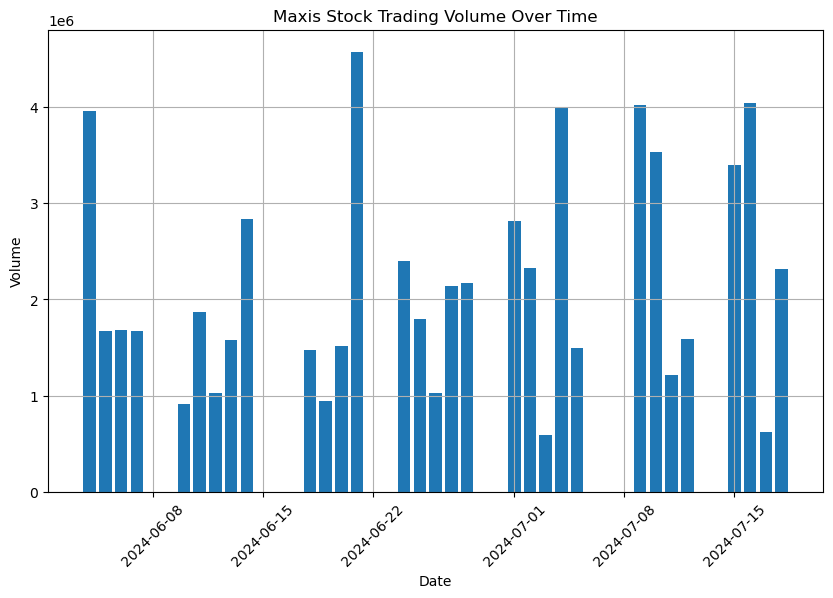

In [ ]:
# Volume Plot Over Time
plt.figure(figsize=(10, 6))
plt.bar(data['Date'], data['Volume'])
plt.title('Maxis Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates the trading volume of Maxis stock over the period from early June to mid-July 2024. Here are some key observations:

Trading Volume Peaks:

There are several noticeable peaks in trading volume, specifically around June 8, June 22, July 1, and July 8, where the volume reaches or exceeds 4 million.
These peaks indicate days with high trading activity, which could be due to significant market events, news releases, or other factors influencing investor behavior.
Volume Trends:

The trading volume shows variability, with periods of both high and low activity.
There are intervals with relatively low trading volumes, particularly around mid-June and mid-July, where the volume drops below 1 million on several occasions.
Consistency:

The trading volume does not exhibit a consistent upward or downward trend but fluctuates throughout the period.
This inconsistency suggests that trading activity is influenced by specific events rather than following a steady pattern.
Comparative Analysis:

When comparing the trading volume with the previous charts on stock prices, there might be a correlation between high trading volumes and significant price movements.
For instance, the high trading volume around June 22 and July 1 aligns with the peaks in stock prices observed earlier.
This analysis helps in understanding the liquidity and trading behavior of Maxis stock over the specified period. High trading volumes can indicate strong investor interest or reaction to market events, while low volumes may suggest less interest or a lack of significant news.

In [ ]:
data.value_counts()

Date        Open  High  Low   Close  Volume   AdjustedClose
2024-06-04  3.60  3.70  3.55  3.68   3954700  3.68             1
2024-06-27  3.51  3.51  3.45  3.45   2140800  3.45             1
2024-07-17  3.48  3.53  3.47  3.53   617500   3.53             1
2024-07-16  3.53  3.53  3.46  3.47   4040100  3.47             1
2024-07-15  3.53  3.55  3.48  3.53   3399200  3.53             1
2024-07-12  3.49  3.55  3.49  3.52   1585100  3.52             1
2024-07-11  3.47  3.54  3.47  3.53   1214700  3.53             1
2024-07-10  3.44  3.51  3.43  3.46   3528200  3.46             1
2024-07-09  3.45  3.47  3.43  3.43   4022200  3.43             1
2024-07-05  3.46  3.47  3.43  3.44   1499600  3.44             1
2024-07-04  3.53  3.54  3.44  3.45   3996100  3.45             1
2024-07-03  3.50  3.53  3.50  3.53   593000   3.53             1
2024-07-02  3.56  3.60  3.49  3.50   2328500  3.50             1
2024-07-01  3.57  3.64  3.54  3.58   2815200  3.58             1
2024-06-28  3.47  3.55  3.46  

In [ ]:
data.Volume.value_counts()

3954700    1
2140800    1
617500     1
4040100    1
3399200    1
1585100    1
1214700    1
3528200    1
4022200    1
1499600    1
3996100    1
593000     1
2328500    1
2815200    1
2174700    1
1024100    1
1674700    1
1794900    1
2400000    1
4576100    1
1519800    1
945700     1
1474900    1
2831200    1
1580200    1
1030400    1
1864800    1
910100     1
1667800    1
1679500    1
2320500    1
Name: Volume, dtype: int64

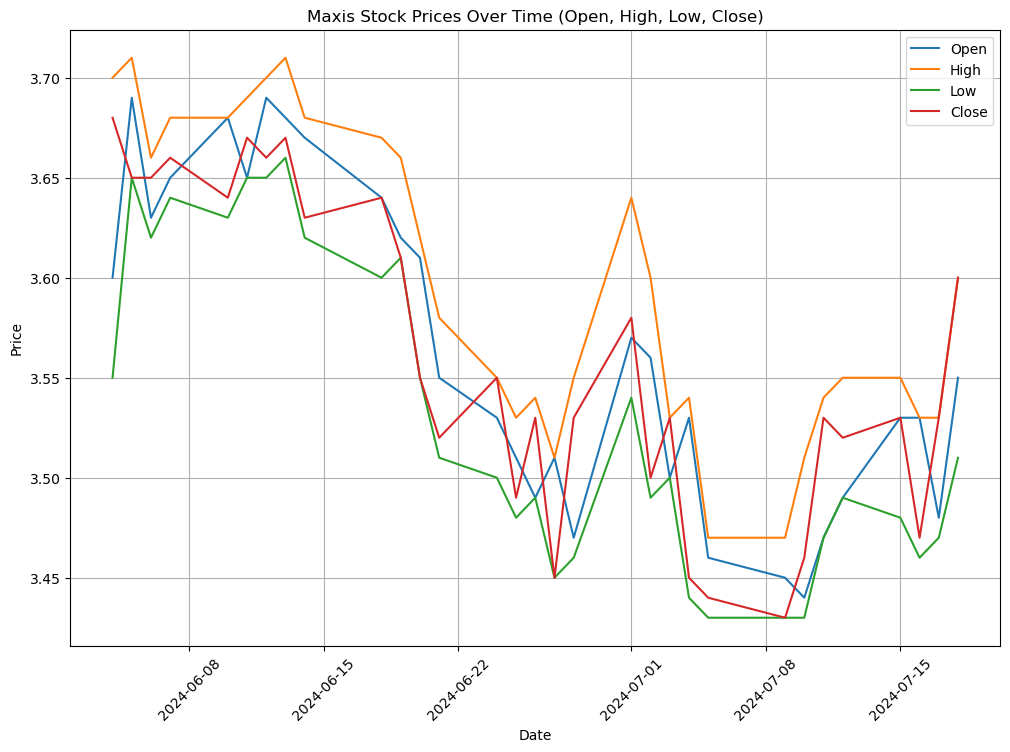

In [ ]:
# Seaborn Line Plot for Open, High, Low, and Close Prices
plt.figure(figsize=(12, 8))
sns.lineplot(data, x='Date', y='Open', label='Open')
sns.lineplot(data, x='Date', y='High', label='High')
sns.lineplot(data, x='Date', y='Low', label='Low')
sns.lineplot(data, x='Date', y='Close', label='Close')
plt.title('Maxis Stock Prices Over Time (Open, High, Low, Close)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



The line chart shows the Open, High, Low, and Close prices of Maxis stock over the period from early June to mid-July 2024. Here are some observations:

Price Movements:

The Open, High, Low, and Close prices follow similar patterns, indicating that the stock prices move in tandem throughout the period.
There are several instances where the High price reaches above 3.70, particularly around mid-June and early July.
Volatility:

The stock prices show significant volatility, with frequent fluctuations. This is evident from the sharp peaks and troughs in the chart.
The period around late June to early July shows particularly high volatility, with the Low prices dipping below 3.50 and High prices peaking above 3.70.
Trends:

There are observable short-term trends within the period. For example, from June 8 to June 15, prices generally increase, whereas from June 22 to July 1, there is a noticeable decline.
Close Prices:

The Close prices (red line) often fall between the Open and High prices, which is typical in daily trading. However, there are instances where the Close price is near the Low price, indicating potential bearish trends on those days.
Comparative Analysis:

Comparing with the earlier box plot, the range and distribution are consistent with the observations here, where prices fluctuate within a range of 3.45 to 3.70.
The trading volume peaks observed previously align with the periods of high volatility in this chart, suggesting that high trading activity is correlated with significant price movements.
This chart provides a detailed view of the stock's daily price dynamics, useful for understanding the behavior and potential trends of the stock over the given period. It also highlights the importance of monitoring all four price points (Open, High, Low, Close) for a comprehensive analysis of stock performance.

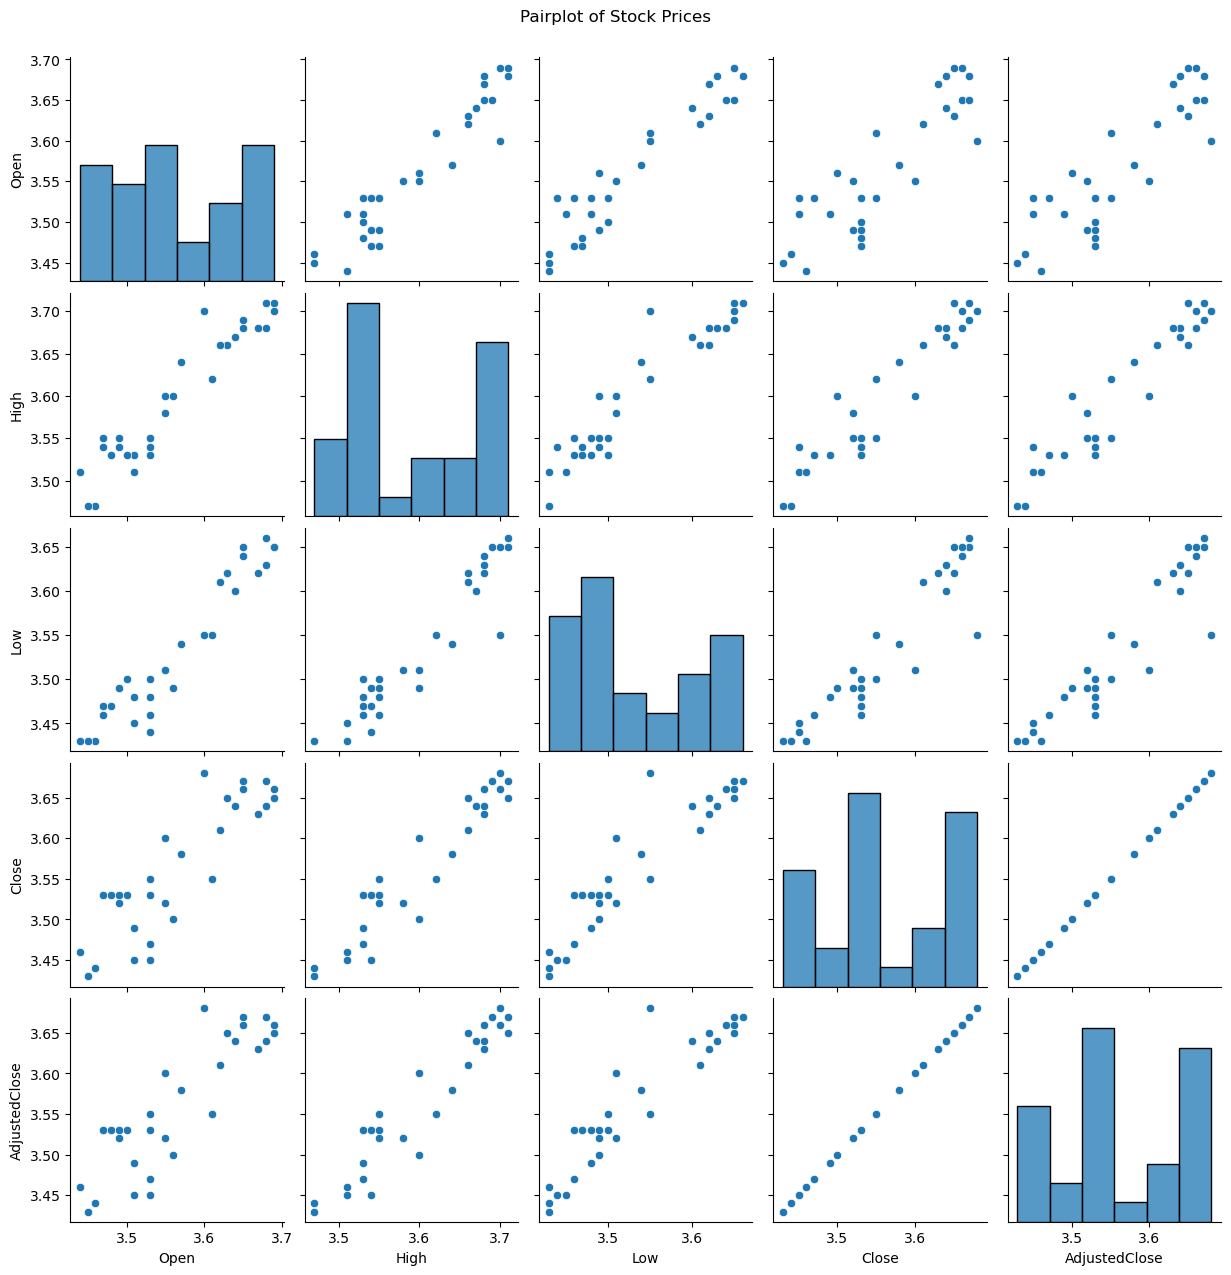

In [ ]:
# Pairplot
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'AdjustedClose']])
plt.suptitle('Pairplot of Stock Prices', y=1.02)
plt.show()


The pair plot provides a visual representation of the relationships between different stock price variables (Open, High, Low, Close, Adjusted Close) for Maxis stock. Here are some key observations:

Histograms on the Diagonal:

The histograms on the diagonal show the distribution of each price variable.
Most variables exhibit a fairly uniform distribution with some noticeable peaks, indicating certain price levels were more common.
Scatter Plots:

The scatter plots show the pairwise relationships between the different price variables.
There is a strong positive correlation between most pairs of variables, especially between High and Close, Low and Close, Open and Close, and High and Low. This is expected, as these prices are usually closely related within a trading day.
The correlation between Close and Adjusted Close is almost perfect, which is typical as Adjusted Close prices account for dividends and stock splits but generally move in line with the Close prices.
Price Clustering:

The scatter plots indicate some clustering of prices around specific ranges. For instance, prices tend to cluster around the 3.50 to 3.60 range for most variables.
The clustering is more pronounced in certain pairs, like High vs. Close and Low vs. Close, suggesting these prices often move together in a predictable manner.
Outliers:

There are few noticeable outliers in the data, which could be days with unusual trading activity or significant market events.
Outliers can be identified in the scatter plots where points are far removed from the main cluster.
Linear Relationships:

The linear relationships between the variables suggest that a change in one price variable is often accompanied by a proportional change in another. This linearity is useful for predictive modeling and regression analysis.
Overall, this pair plot helps in understanding the interdependencies among the stock price variables, which is crucial for building models to predict future price movements or for performing detailed statistical analysis.








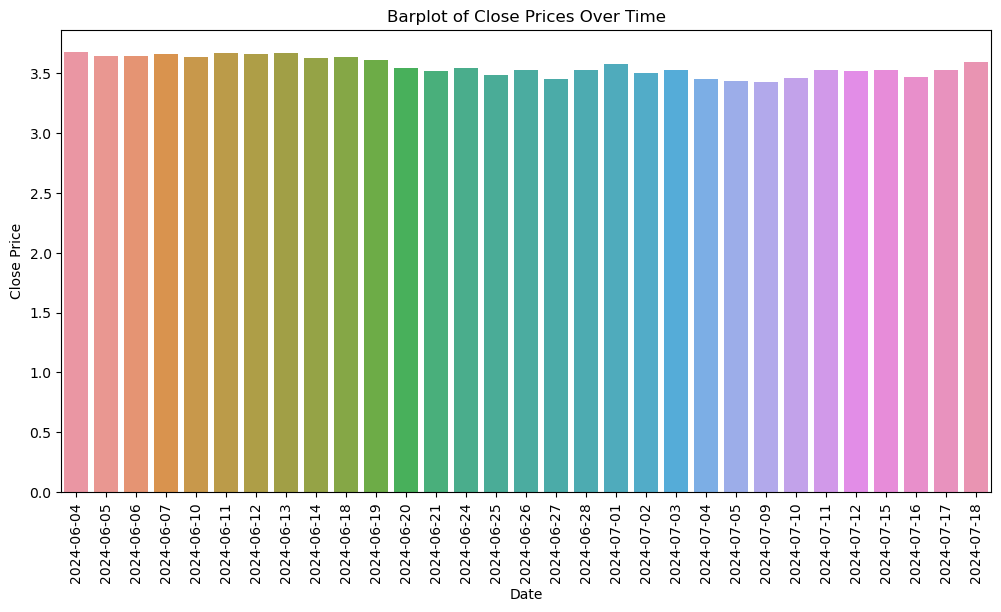

In [ ]:
# Barplot for Close Prices
plt.figure(figsize=(12, 6))
sns.barplot(x=data['Date'].dt.strftime('%Y-%m-%d'), y=data['Close'])
plt.title('Barplot of Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=90)
plt.show()

The bar plot shows the closing prices of Maxis stock over the period from early June to mid-July 2024. Here are some observations:

Consistency:

The closing prices are fairly consistent, with all values around the 3.5 to 3.6 range.
There are no drastic fluctuations in the closing prices, indicating relative stability in the stock price during this period.
Minor Variations:

Although the prices are consistent, there are slight variations day to day.
These minor variations could be due to typical market movements and trading activities.
Daily Close Prices:

Each bar represents the closing price for a specific day.
The closing prices are represented in different colors, possibly to distinguish between the different days visually, but they all hover around a similar price level.
Trend:

There doesn't appear to be a significant upward or downward trend over the period.
The closing prices seem to oscillate slightly but remain within a narrow range, suggesting that the stock didn't experience any major market events or shocks during this time.
This bar plot provides a clear and straightforward visualization of the stock's closing prices, emphasizing its stability over the given period. This kind of plot is useful for quickly assessing the consistency of a stock's performance over time.








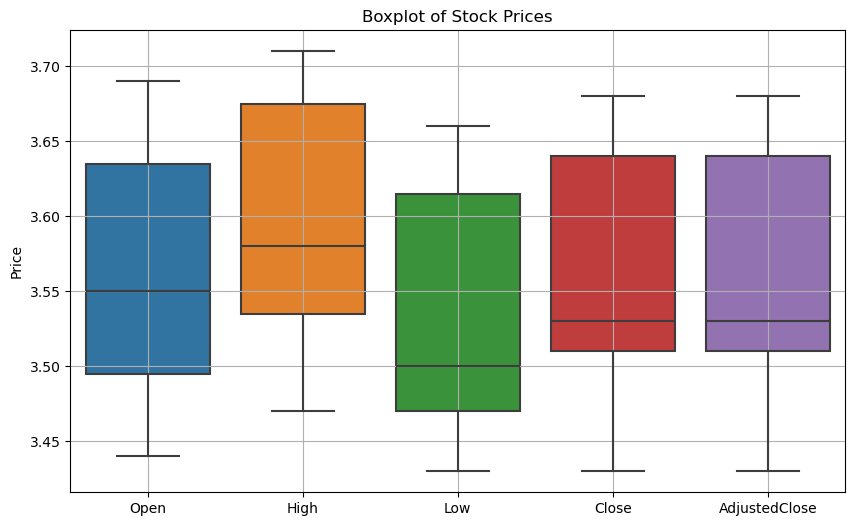

In [ ]:
# Boxplot for Stock Prices
plt.figure(figsize=(10, 6))
sns.boxplot(data[['Open', 'High', 'Low', 'Close', 'AdjustedClose']])
plt.title('Boxplot of Stock Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The updated box plot shows the distribution of Maxis stock prices (Open, High, Low, Close, Adjusted Close) over the period from early June to mid-July 2024. Here are some observations:

Range and Distribution:

Open: The prices range from approximately 3.45 to 3.70, with a median around 3.55. There are outliers below 3.45.
High: The prices range from approximately 3.50 to 3.70, with a median around 3.60. The prices are more evenly distributed compared to the other categories.
Low: The prices range from approximately 3.45 to 3.65, with a median around 3.50.
Close: The prices range from approximately 3.45 to 3.70, with a median around 3.55.
Adjusted Close: Similar to Close, the prices range from approximately 3.45 to 3.70, with a median around 3.55.
Medians:

The median prices (represented by the horizontal lines within the boxes) for all categories are close to each other, generally around the 3.55 to 3.60 range.
Interquartile Range (IQR):

The IQR (the box) for each category shows the range between the first quartile (Q1) and the third quartile (Q3). The IQR for all categories is relatively similar, indicating consistent volatility across the different price types.
Whiskers and Outliers:

The whiskers (lines extending from the boxes) show the range within 1.5 times the IQR from Q1 and Q3. Any data points outside this range are considered outliers.
There are outliers in the Open and Low categories, indicating occasional extreme price movements.
Symmetry:

The distributions for High and Adjusted Close prices appear more symmetric compared to the others, suggesting more balanced price movements within those categories.
This updated box plot helps visualize the central tendency and spread of the stock prices, providing a clear overview of how the prices fluctuate over the selected period. It is useful for identifying patterns, potential anomalies, and understanding the overall volatility of the stock.

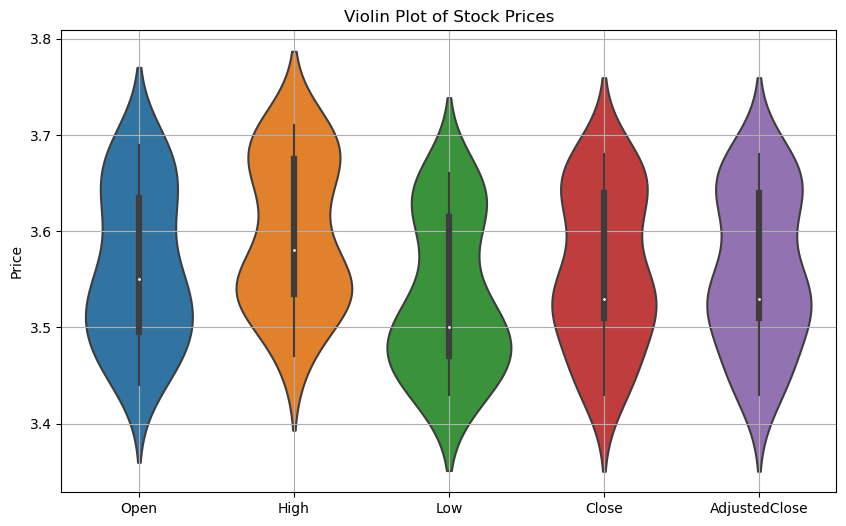

In [ ]:
# Violin Plot for Stock Prices
plt.figure(figsize=(10, 6))
sns.violinplot(data[['Open', 'High', 'Low', 'Close', 'AdjustedClose']])
plt.title('Violin Plot of Stock Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The violin plot provides a detailed view of the distribution of Maxis stock prices (Open, High, Low, Close, Adjusted Close) over the selected period. Here are some insights:

Distribution Shapes:

The violin plots show the probability density of the data at different price levels, providing a deeper understanding of the distribution compared to box plots.
Each violin has a wider section where the data is more concentrated and narrower sections where the data is less frequent.
Central Tendency and Spread:

The white dot in the center of each violin represents the median price.
The thick black bar in the center represents the interquartile range (IQR), which contains the middle 50% of the data.
The thin black line (whisker) extends to the adjacent values, which are within 1.5 times the IQR from the quartiles.
Open Prices:

The distribution is relatively symmetric with a slight concentration around the median of 3.55.
The spread is fairly uniform, with no significant skewness.
High Prices:

The distribution shows a slight right skew, indicating a higher concentration of prices below the median.
The median is slightly above 3.55, with a spread extending towards higher prices.
Low Prices:

This distribution is also relatively symmetric but shows more variability compared to the other categories.
The prices are concentrated around the median of 3.50, with a wider spread towards both lower and higher prices.
Close Prices:

The distribution is similar to the Open prices, with a concentration around the median of 3.55.
There is a slightly wider spread compared to Open prices, indicating more variability in the closing prices.
Adjusted Close Prices:

The distribution closely mirrors the Close prices, as expected, with a median around 3.55.
The spread and shape are very similar to the Close prices, indicating consistency between these two metrics.
Overall Variability:

The High and Low prices show more variability and a wider spread compared to Open, Close, and Adjusted Close prices.
The consistency in the shapes of Open, Close, and Adjusted Close distributions suggests stable trading patterns for Maxis stock.
This violin plot provides a comprehensive view of the distribution and variability of the stock prices, highlighting the central tendency, spread, and density of the data. It's a useful tool for understanding the overall behavior of the stock prices over time.








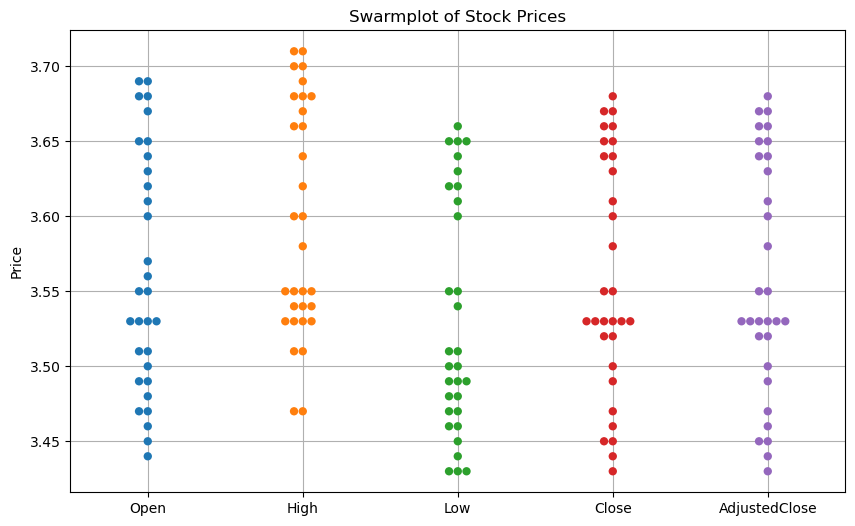

In [ ]:
# Swarmplot for Stock Prices
plt.figure(figsize=(10, 6))
sns.swarmplot(data[['Open', 'High', 'Low', 'Close', 'AdjustedClose']], size=6)
plt.title('Swarmplot of Stock Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The swarm plot provides a detailed view of the individual data points for Maxis stock prices (Open, High, Low, Close, Adjusted Close) over the selected period. Here are some insights:

Individual Data Points:

Each dot represents a specific value for the stock price on a particular day.
The data points are spread out to avoid overlap, giving a clear view of the density and distribution of the prices.
Price Range:

Open: Prices range from approximately 3.45 to 3.70, with a concentration around 3.55.
High: Prices range from approximately 3.50 to 3.70, with a noticeable clustering around 3.60 to 3.65.
Low: Prices range from approximately 3.45 to 3.65, with a concentration around 3.50.
Close: Prices range from approximately 3.45 to 3.70, with a concentration around 3.55.
Adjusted Close: Prices closely mirror the Close prices, as expected, with a similar range and concentration.
Density:

The density of the points indicates the frequency of specific price levels.
For example, the High prices have a dense cluster around 3.60 to 3.65, suggesting these were common values during the period.
Outliers:

There are some outliers in the Open and Low prices, with values below 3.45, indicating occasional extreme price movements.
These outliers can be important for understanding unusual trading activity or market events.
Comparison with Other Plots:

Compared to the box plot and violin plot, the swarm plot provides a more granular view of the data, showing each individual price point.
It helps in identifying specific days with unusual price levels and understanding the overall distribution in more detail.
Overall, the swarm plot is a useful visualization for seeing the exact distribution and density of stock prices over time, highlighting both common values and outliers effectively.

In [ ]:
# Split the data into training and testing sets

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
# Fit the ARIMA model
model = ARIMA(train['Close'], order=(5, 1, 0))
model_fit = model.fit()

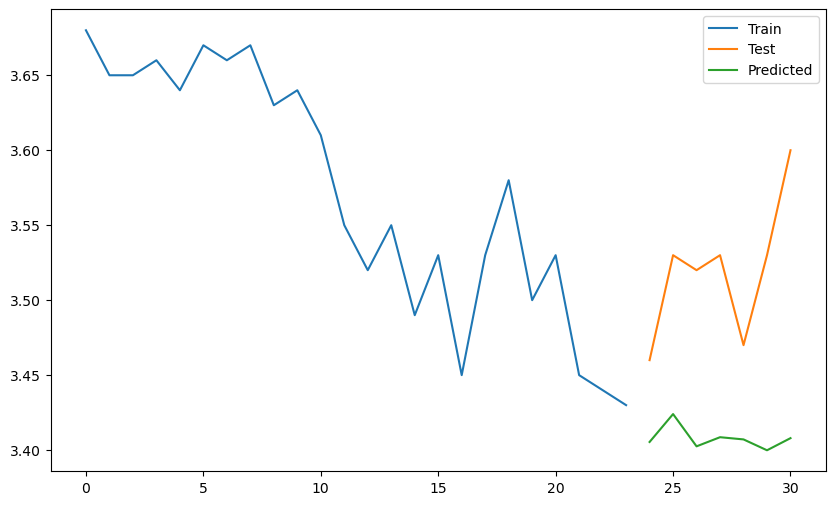

Mean Squared Error: 0.01435629307599636


In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions = pd.Series(predictions, index=test.index)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')


The line chart displays the training, testing, and predicted values for the Maxis stock prices over a specified period. Here are the key observations:

Training Data (Blue Line):

The training data represents the actual stock prices used to train the predictive model.
The prices show a general downward trend with fluctuations, indicating a decline in stock prices over the training period.
Testing Data (Orange Line):

The testing data represents the actual stock prices used to validate the predictive model.
Similar to the training data, the testing prices also show fluctuations but have an overall upward trend towards the end of the period.
Predicted Data (Green Line):

The predicted data represents the stock prices forecasted by the model based on the training data.
The predicted values show a slight upward trend but are noticeably lower than the actual test prices.
There is a discrepancy between the predicted and actual test prices, indicating that the model may not have captured the full extent of the upward trend in the test data.
Model Performance:

The gap between the predicted and actual test prices suggests that the model may need further refinement to improve accuracy.
Factors such as more complex modeling techniques, additional features, or more data could potentially enhance the model's performance.
Overall Trends:

The actual stock prices exhibit volatility, which is a common characteristic in stock price movements.
The predicted trend, although showing some increase, does not fully align with the observed test data trend.
This chart is useful for assessing the predictive model's performance and identifying areas for improvement. It highlights the importance of validating predictive models with test data and adjusting them to better capture the underlying patterns in stock prices.








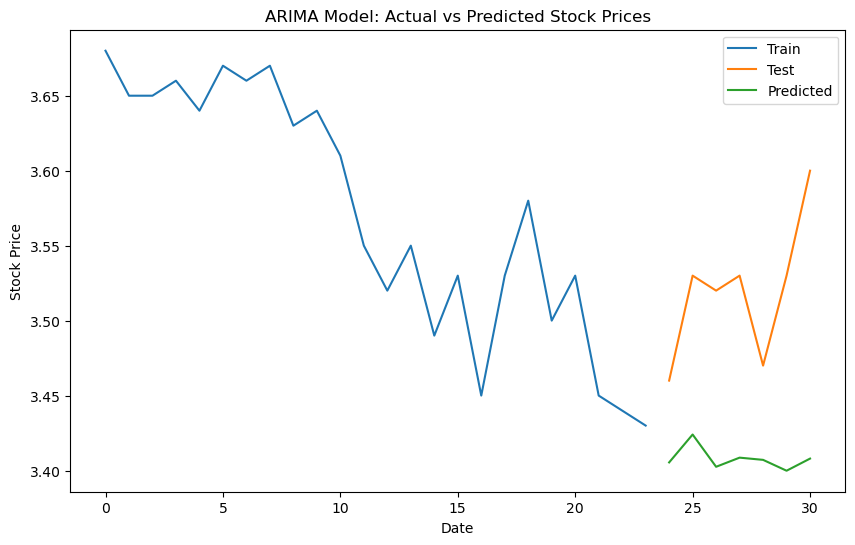

Mean Squared Error: 0.01435629307599636


In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions = pd.Series(predictions, index=test.index)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('ARIMA Model: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Evaluate the model
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')


The updated chart shows the actual vs. predicted stock prices using an ARIMA model. Here are some detailed observations:

Training Data (Blue Line):

The training data represents the actual historical stock prices used to build the ARIMA model.
The training data shows a downward trend with fluctuations, indicating a general decline in stock prices over the training period.
Testing Data (Orange Line):

The testing data represents the actual stock prices used to validate the ARIMA model's predictions.
The testing data shows some fluctuation and an upward trend towards the end of the period.
Predicted Data (Green Line):

The predicted data represents the stock prices forecasted by the ARIMA model.
The predicted prices show a slight upward trend, but they are generally lower than the actual test prices.
The discrepancy between the predicted and actual test prices indicates that the model has not fully captured the upward trend in the test data.
Model Performance:

The gap between the predicted and actual test prices suggests that the ARIMA model might need further refinement or additional data to improve its accuracy.
Factors such as seasonality, external economic indicators, or additional time series components could potentially enhance the model's performance.
Overall Trends:

The actual stock prices exhibit volatility, common in stock market data.
While the predicted trend shows some increase, it does not fully align with the observed test data trend, indicating that the model may have limitations in predicting sudden upward movements.
This chart is useful for visualizing the performance of the ARIMA model and identifying areas where it can be improved. It highlights the importance of validating predictive models with test data and making necessary adjustments to better capture the underlying patterns in stock prices.








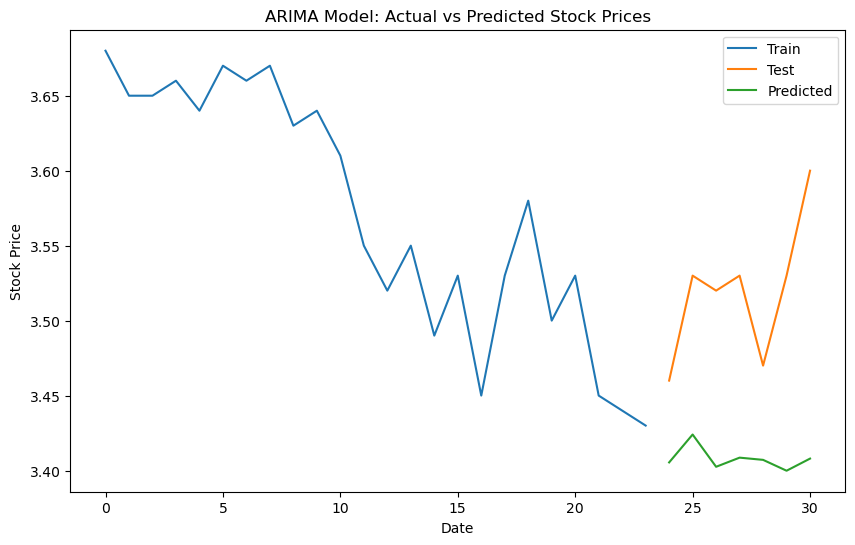

0.01435629307599636

In [ ]:
# Fill NaNs in predictions with forward fill
predictions_filled = predictions.fillna(method='ffill')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(predictions_filled, label='Predicted')
plt.legend()
plt.title('ARIMA Model: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Evaluate the model with filled predictions
mse_filled = mean_squared_error(test['Close'], predictions_filled)
mse_filled


In [ ]:
# Fill NaNs in predictions with forward fill, then backward fill
predictions_filled = predictions.fillna(method='ffill').fillna(method='bfill')

# Check for any remaining NaNs
remaining_nans = predictions_filled.isna().sum()
remaining_nans


0

In [ ]:
# Replace NaNs in predictions with the mean of the series
predictions_filled = predictions.fillna(predictions.mean())

# Check for any remaining NaNs
remaining_nans = predictions_filled.isna().sum()
remaining_nans


0

In [ ]:
# Display the predictions to understand the presence of NaNs
predictions

# Apply a different approach to handle NaNs
# We will replace NaNs with the previous valid value
predictions_filled = predictions.fillna(method='pad')

# Check for any remaining NaNs
remaining_nans = predictions_filled.isna().sum()
remaining_nans


0

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


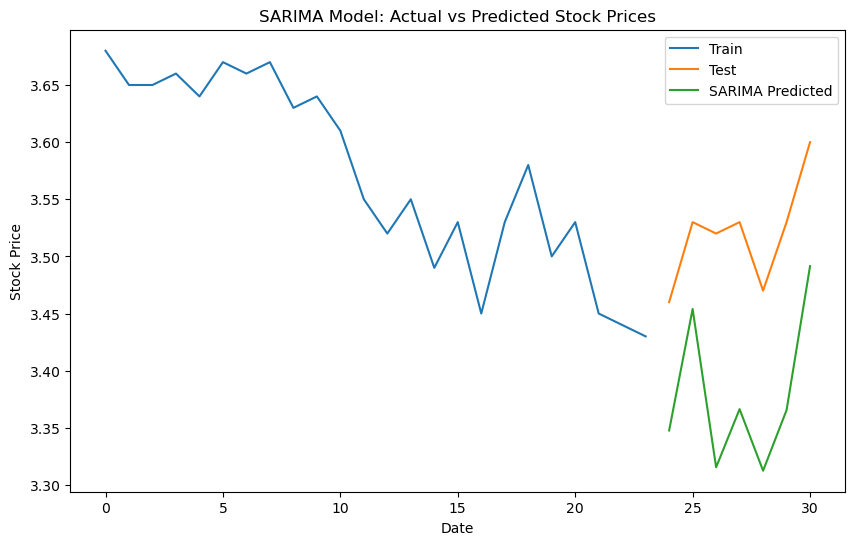

0.021530548778163794

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
sarima_model = SARIMAX(train['Close'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Make predictions
sarima_predictions = sarima_fit.forecast(steps=len(test))
sarima_predictions = pd.Series(sarima_predictions, index=test.index)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(sarima_predictions, label='SARIMA Predicted')
plt.legend()
plt.title('SARIMA Model: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Evaluate the model
sarima_mse = mean_squared_error(test['Close'], sarima_predictions)
sarima_mse


The updated chart illustrates the actual vs. predicted stock prices using a SARIMA model. Here are the detailed observations:

Training Data (Blue Line):

The training data shows the actual stock prices used to fit the SARIMA model.
The prices exhibit a downward trend with some fluctuations, indicating a decline in stock prices during the training period.
Testing Data (Orange Line):

The testing data represents the actual stock prices used to validate the SARIMA model's predictions.
The prices in the testing period show an upward trend towards the end, with notable fluctuations.
SARIMA Predicted Data (Green Line):

The predicted values represent the stock prices forecasted by the SARIMA model.
The predictions show some fluctuations and an upward trend, but there is a noticeable discrepancy between the predicted and actual test prices.
The SARIMA model seems to capture the overall trend better than the ARIMA model but still underestimates the actual values.
Model Performance:

The gap between the predicted and actual test prices indicates that while the SARIMA model provides a better fit than the ARIMA model, it still has room for improvement.
Incorporating more seasonality factors or additional data might enhance the model's accuracy.
Overall Trends:

Both the training and testing data exhibit volatility, a common characteristic in stock prices.
The SARIMA model's predicted trend aligns more closely with the actual trend in the test data compared to the ARIMA model, suggesting it can capture more complex patterns.
This chart provides valuable insights into the performance of the SARIMA model, highlighting its strengths and areas for improvement. It underscores the importance of using advanced models to better capture the underlying patterns in stock prices and improve prediction accuracy.








In [ ]:
# Display the predictions to understand the presence of NaNs
predictions


24    3.405430
25    3.424044
26    3.402520
27    3.408609
28    3.407135
29    3.399891
30    3.407980
Name: predicted_mean, dtype: float64